In [1]:
# Importar bibliotecas
import numpy as np
import matplotlib.pyplot as plt

# Setar a seed
np.random.seed(6)

In [2]:
# Ler o dataset
X = np.loadtxt("iris.data", delimiter=',', usecols=(0,1,2,3)) # Features
y = np.loadtxt("iris.data", delimiter=',', dtype=object, usecols=(4)) # Target

# Rearranjar o dataset
shuffler = np.random.permutation(len(X)) # Cria ordem aleatoria dos índices 
X, y = X[shuffler], y[shuffler]

# Separar o dataset em treino, validação e teste (Split 4:1:1)
X_train, X_val, X_test = X[:100,:], X[100:125,:], X[125:,:]
X_train, X_val, X_test = (np.concatenate((X_train, np.ones((100,1))),axis=1), np.concatenate((X_val,np.ones((25,1))),axis=1), 
                          np.concatenate((X_test,np.ones((25,1))),axis=1)) # Concatena coluna de 1's para o elemento bias
y_train, y_val, y_test = y[:100], y[100:125], y[125:150] 

b) Em IA os dados são comumente dividos em 3 conjuntos, assim como no código acima, afim de evitar vazamento de dados no processo de criação do modelo:

**Treino** - Normalmente é o maior dos 3 conjuntos, pois é usado para treinar o modelo.

**Validação** - Tem a função de avaliar a performance do modelo durante o treinamento para otimização dos hiperparâmetros.
    
**Teste** - Com o modelo já pronto usamos esse conjunto para testar sua capacidade de inferência em dados não previamente vistos.

In [3]:
# Implementação do perceptron
class perceptron:
    """ 
    Classe para criação de um modelo perceptron

    ...

    Atributos
    ---------
    w : np.array
        Pesos usados no modelo
    r : float
        Taxa de aprendizado
    hash : dict
        Dicionário relacionando classes com valores numéricos
    inv_hash : dict
        Dicionário trocando as chaves e items de hash
    success : np.array
        Contagens dds números de erros em cada um dos conjuntos de dados treino, validação e teste para cada época

    Métodos
    -------
    fit(X, y, error=False)
        Treina o modelo de perceptron usando as features X e alvo y
    predict(X)
        Faz inferência nos dados X
    """
    def __init__(self, w, r, hash):
        """
        Parâmetros
        ----------
        w : np.array
            Valores iniciais dos pesos do modelo
        r : float
            Taxa de aprendizado
        hash : dict
            Dicionário das classes relacionadas a valores inteiros
        """
        self.w = w
        self.r = r
        self.hash = hash
        self.inv_hash = {v: k for k, v in self.hash.items()}
    def fit(self, X, y, N, tests=[]):
        """
        Treina o modelo com features X e alvo y

        Se error=True testa o modelo e salva o resultado a cada iteração

        Parâmetros
        ----------
        X : np.array
            Features a serem utilizadas no treinamento
        y : np.array
            Valores verdadeiros do alvo
        N : int
            Número de épocas
        tests : lista de tuplas
            Conjunto treino, validação e teste que devem ser usados para calcular performance
        """
        self.success = []
        # Itera pelo número de épocas
        for n in range(N):
            # Itera por cada vetor de features
            for i in range(len(X)):
                x = X[i]
                pred = np.argmax(np.dot(x,self.w)) # Usa modelo atual para prever a classe
                true = self.hash[y[i]]
                if pred != true: # Testa se a previsão não foi correta
                    self.w[:,true] += self.r*x # Soma nos pesos da classe correta
                    self.w[:,pred] -= self.r*x # Subtrai nos pesos da classe incorreta
            if len(tests) > 0:
                self.success.append([np.sum(self.predict(tests[0][0])!=tests[0][1]),
                                     np.sum(self.predict(tests[1][0])!=tests[1][1]),
                                     np.sum(self.predict(tests[2][0])!=tests[2][1])])
        self.success = np.array(self.success)
    def predict(self, X):
        """
        Realiza inferência para os dados X

        Parâmetros
        ----------
        X : np.array
            Dados a serem usados na inferência
        """
        preds = np.argmax(np.dot(X,self.w),axis=1) # Realiza a inferência, resultando em valores númericos
        return np.vectorize(self.inv_hash.get)(preds) # Transforma as previsões para os nomes das classes
        

In [4]:
# Inicialização de parâmetros
hash = {'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}
w = np.random.rand(15).reshape((5,3))
N = 10

# Busca pela taxa de aprendizado ideal
perf = [] # Lista de performances
rs = [0.001,0.005,0.01,0.05,0.1,0.5,1] # Possíveis valores para r
for r in rs:
    perc = perceptron(w, r, hash) # Inicializa modelo
    perc.fit(X_train, y_train, N) # Treina o modelo
    perf.append(np.sum(perc.predict(X_val)!=y_val)/len(X_val)) # Adiciona a performance a lista
print("Melhor valor para a taxa de aprendizado (r):")
print(rs[np.argmin(perf)])

Melhor valor para a taxa de aprendizado (r):
1


In [5]:
r=1
modelo = perceptron(w, r, hash)
modelo.fit(X_train,y_train, N,tests=[(X_train,y_train),(X_val,y_val),(X_test,y_test)]) # Treina testando e armazenando a performance por época
test_preds = modelo.predict(X_test)
print(test_preds)

['Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica']


a) A saída do último bloco de código representa uma rodada de inferência com os dados de teste.

In [6]:
train_preds = modelo.predict(X_train)
print("Taxa de acerto nos dados de treino:")
print(np.sum(train_preds==y_train)/100)
print("Taxa de acerto nos dados de teste:")
print(np.sum(test_preds==y_test)/25)
print("Diferença das taxas de acerto:")
print(abs(np.sum(train_preds==y_train)/100 - np.sum(test_preds==y_test)/25))

Taxa de acerto nos dados de treino:
0.97
Taxa de acerto nos dados de teste:
1.0
Diferença das taxas de acerto:
0.030000000000000027


c) Overfitting é o termo usado para descrever quando um modelo se ajusta exageradamente aos dados de treino, de forma que sua capacidade de generalizar para outros dados é severamente prejudicada.

O modelo aqui desenvolvido não está sofrendo de overfitting, uma boa indicação disso é que como visto acima a performance nos dados de teste chega a superar a dos dados de treino.

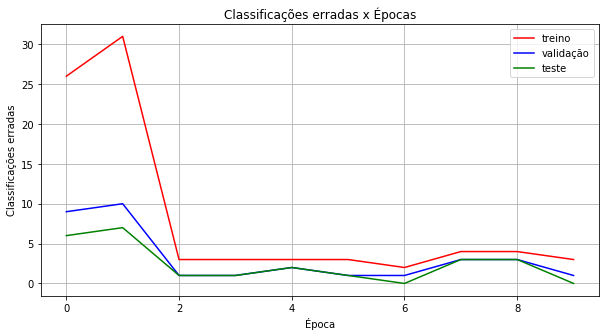

In [7]:
plt.figure(figsize=(10,5))

plot_data = modelo.success

plt.plot(np.arange(10), plot_data[:,0], color='r', label='treino')
plt.plot(np.arange(10), plot_data[:,1], color='b', label='validação')
plt.plot(np.arange(10), plot_data[:,2], color='g', label='teste')

plt.xlabel("Época")
plt.ylabel("Classificações erradas")
plt.title("Classificações erradas x Épocas")

plt.legend()

plt.grid()

plt.show()

d) O gráfico acima mostra a quantidade de classificações erradas por época para cada um dos 3 conjuntos de dados.

Como as 3 classes estão igualmente distribuidas nos dados a acurácia é uma boa métrica para análise da performance (no gráfico temos 1-acurácia), pórem para maiores análises também poderiamos fazer a matriz de confusão e com ela calcular outras métricas como precisão e F1-score.

e) Devido ao modelo utilizar apenas de um único perceptron, ele só é capaz de aprender padrões lineares para separar as classes o que nesse caso de mostrou satisfatório. Se aumentarmos o número de perceptrons em nosso modelo isso lhe daria a capacidade de aprender padrões mais complicados, isso se dá devido a possibilidade de relacionarmos os vários perceptrons por portas lógicas.